# Credit Card Transaction Fraud Detection

<img src="metadata/credit-card-fraud.jpg" width="800" height="800">

### References
https://medium.com/@curiousily/credit-card-fraud-detection-using-autoencoders-in-keras-tensorflow-for-hackers-part-vii-20e0c85301bd


In [1]:

%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras.callbacks import ModelCheckpoint, TensorBoard

from keras.models import Sequential
from keras.layers import Dense

import seaborn as sns

import numpy as np

Using TensorFlow backend.


# Set Randomization Seed

In [2]:
SEED = 123

from numpy.random import seed
seed(SEED)
from tensorflow import set_random_seed
set_random_seed(SEED)

# Load Data

Data download from https://www.kaggle.com/mlg-ulb/creditcardfraud
with 492 frauds out of 284,807 transactions
over a period of two days 

It contains only numerical input variables which are the result of a PCA transformation.

In [3]:
df = pd.read_csv('../../data/creditcard.csv')

df.sample(n = 10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
73129,54992.0,-0.623235,1.097949,0.748810,0.763394,-0.179458,-0.258895,0.430106,0.466788,-0.935937,...,0.243136,0.468435,-0.055127,-0.012280,-0.236499,-0.327825,0.023302,0.089418,50.00,0
229597,145983.0,2.155748,-0.998223,-1.158978,-0.992298,-0.484600,-0.308857,-0.677077,-0.193517,-0.083026,...,0.174775,0.519005,0.003460,-1.017962,-0.009465,-0.118435,-0.006350,-0.053375,58.00,0
220218,142073.0,1.614893,-0.194953,-2.050402,1.469645,0.540352,-0.665439,0.677713,-0.246032,-0.079937,...,-0.029061,-0.369654,-0.071308,-0.520915,0.091351,-0.749140,-0.023202,-0.003519,198.00,0
198374,132462.0,1.908756,-2.517443,0.277391,-1.466555,-1.521858,3.005920,-2.800770,0.981435,0.349534,...,0.050867,0.984547,0.163995,-0.905736,-0.511626,0.097492,0.147579,-0.036551,82.00,0
167980,119001.0,2.120853,-1.048240,-1.895990,-1.236063,-0.038722,-0.274832,-0.388942,-0.196979,-0.649028,...,0.455959,1.125977,-0.263681,-1.322770,0.308495,0.132642,-0.057106,-0.074845,93.75,0
98465,66672.0,-0.634719,0.592442,0.383238,0.570786,1.616970,4.631747,-0.789232,1.646998,0.251358,...,-0.333598,-0.807647,0.013052,1.000277,-0.131596,-0.449776,0.093359,0.090260,24.63,0
200436,133435.0,-3.089446,-2.515804,1.205023,-1.767681,0.594350,-1.130869,-1.008283,0.744072,-1.272679,...,0.384737,-0.229528,0.080999,-0.416668,0.496685,-0.402766,0.131159,-0.326898,167.56,0
113404,73053.0,-2.274617,-2.735528,1.119531,-0.923586,1.489864,-2.101549,-0.772237,0.150989,-1.269018,...,-0.027092,-0.592477,0.639344,0.305030,-0.069783,0.881338,-0.118591,0.154070,144.99,0
149063,90536.0,-0.114786,1.091362,-0.507040,-0.549498,0.964686,-0.385480,0.606305,0.103705,1.509189,...,-0.515381,-1.156256,0.090066,0.125590,-0.457510,0.085614,0.288228,0.119023,3.96,0
41420,40674.0,-0.246513,0.861245,1.890563,1.373825,0.172463,0.001762,0.606328,-0.124765,-0.510219,...,0.027795,0.298056,-0.186672,0.067153,-0.168904,-0.185869,-0.004944,-0.102743,11.01,0


# Plot the labels distribution

0    284315
1       492
Name: Class, dtype: int64


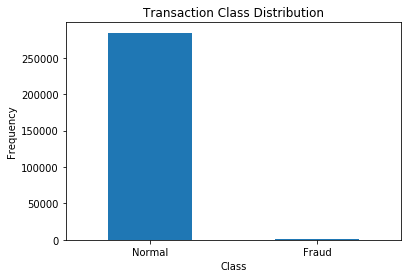

In [4]:
labels_dist = pd.value_counts(df['Class'], sort = True)

labels_dist.plot(kind = 'bar', rot = 0)
plt.title('Transaction Class Distribution')
plt.xticks(range(2), ["Normal", "Fraud"])
plt.xlabel('Class')
plt.ylabel('Frequency')


print(labels_dist)

# Plot transactions amount

In [5]:
frauds = df[df.Class == 1]
normal = df[df.Class == 0]


print(frauds['Amount'].describe()) #frauds.Amount.describe()
print('\n')
print(normal['Amount'].describe())

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


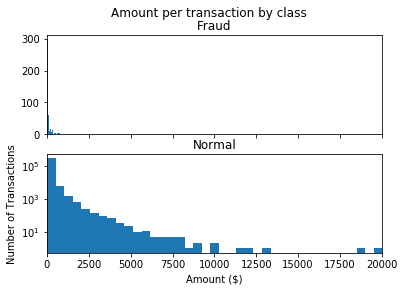

In [6]:
wholeFrame, (subFrame1, subFrame2) = plt.subplots(2, 1, sharex = True)

wholeFrame.suptitle('Amount per transaction by class')

BIN = 50

subFrame1.hist(frauds['Amount'], bins = BIN)
subFrame2.hist(normal['Amount'], bins = BIN)

subFrame1.set_title('Fraud')
subFrame2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')

plt.xlim(0, 20000)
plt.yscale('log')

Text(0.5, 1.0, 'Time vs Amount')

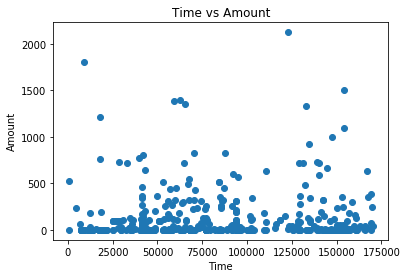

In [7]:
plt.scatter(frauds['Time'], frauds['Amount'])
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('Time vs Amount')

#No visibly patterns of difference of amount transactions with time changes

# Remove unecessary descriptors / features

In [8]:
df.drop(["Time"], axis = 1, inplace = True)

df.head(n = 5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Check for Null and remove duplicates 

In [9]:
df.drop_duplicates(inplace = True)

if  df.isnull().values.any() != False:
        df.fillna(0)

# Standardize to 0 mean and 1.0 variance for Amount column

In [10]:
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))

# Split Data to Training and Testing Data

In [11]:
SPLIT = 0.2
training_data, testing_data = train_test_split(df, test_size = SPLIT, random_state = SEED)

In [12]:

training_data = training_data[training_data.Class == 0]
training_data = training_data.drop(['Class'], axis=1)

testing_labels = testing_data['Class']
testing_data = testing_data.drop(['Class'], axis=1)

# change to numpy array
training_data = training_data.values
testing_data = testing_data.values

print(training_data.shape)

(220148, 29)


# Build Autoencoder

In [13]:
feature_dim = 32

autoencoder = Sequential()
autoencoder.add(Dense(units = feature_dim, input_shape = (training_data.shape[1], ), activation = "relu"))#, activity_regularizer=regularizers.l1(10e-5)))
autoencoder.add(Dense(units = int(feature_dim / 2), activation = "relu"))

autoencoder.add(Dense(units = int(feature_dim / 4), activation = "relu"))
autoencoder.add(Dense(units = int(feature_dim / 4), activation = "relu"))

autoencoder.add(Dense(units = int(feature_dim / 2), activation = "relu"))
autoencoder.add(Dense(units = feature_dim, activation = "relu"))
autoencoder.add(Dense(units = training_data.shape[1], activation = 'linear'))

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

autoencoder.summary()

#add regularizers to prevent overfitting
#Reasonable values of lambda [regularization hyperparameter] range between 0 and 0.1.
# 0.1, 0.001, 0.0001, etc.

#Default 0.01, smaller value less penalty 
                
# use the L1 norm when you want sparsity. weights may be reduced to zero (it can act as feature selection mode)
# use the L2 norm when you don't want large activations. weights will be close to zero

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                960       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_6 (Dense)              (None, 32)                544       
_________________________________________________________________
dens

In [ ]:
# Rule of Thumb for Training
Make sure the total params is less than number of training size 

If parameters are of half of the training size. Hence, this is an appropriate model to fit

Can have a bigger model if add regularization

# Build LSTM Autoencoder 

Given the class imbalance ratio
We recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). 
Confusion matrix accuracy is not meaningful for unbalanced classification.


In [14]:

EPOCH = 100
BATCH_SIZE = 128

checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose = 0,
                               save_best_only=True)

tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history = autoencoder.fit(training_data, training_data, 
                          epochs = EPOCH, 
                          batch_size = BATCH_SIZE,
                          shuffle = True,
                          validation_data = (testing_data, testing_data),
                          verbose = 0,
                          callbacks=[checkpointer, tensorboard]).history

Instructions for updating:
Use tf.cast instead.


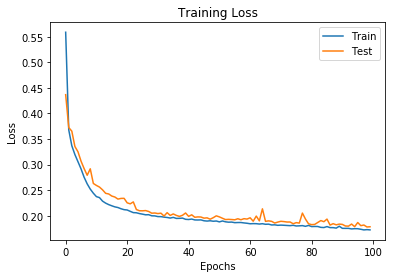

In [15]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])

plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc = 'upper right')

In [16]:
predictions = autoencoder.predict(testing_data)
mse = np.mean(np.power(predictions - testing_data, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': testing_labels})
error_df.describe()


,reconstruction_error,true_class
count,55133.000000,55133.000000
mean,0.178450,0.001651
std,0.632654,0.040594
min,0.006348,0.000000
25%,0.058627,0.000000
50%,0.102309,0.000000
75%,0.188773,0.000000
max,115.643222,1.000000


# Reconstruction Error Without Fraud

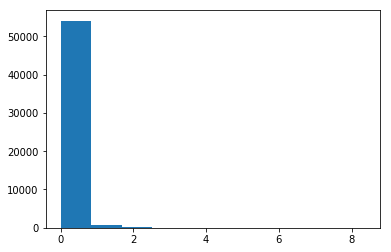

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

# Reconstruction Error With Fraud

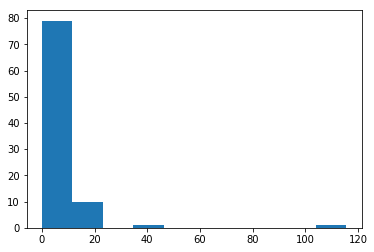

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

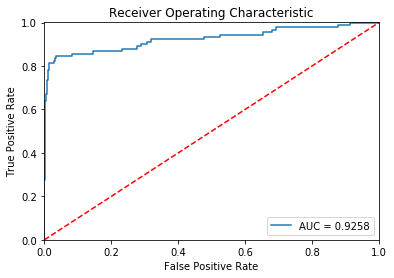

In [19]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

# Plot the testing data distribution

0    55042
1       91
Name: Class, dtype: int64

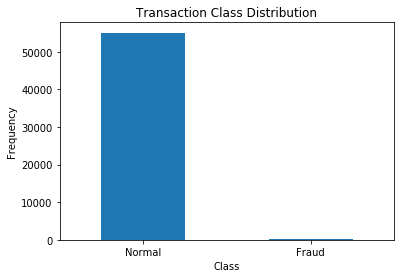

In [20]:
labels_dist = pd.value_counts(testing_labels, sort = True)

labels_dist.plot(kind = 'bar', rot = 0)
plt.title('Transaction Class Distribution')
plt.xticks(range(2), ["Normal", "Fraud"])
plt.xlabel('Class')
plt.ylabel('Frequency')

labels_dist

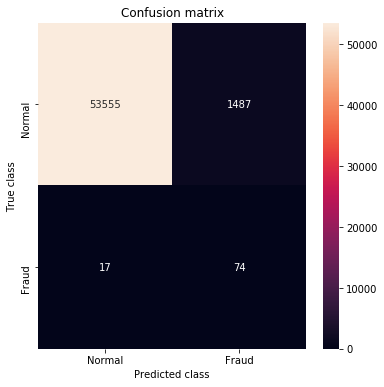

0    55042
1       91
Name: Class, dtype: int64


In [21]:
threshold = 0.7

pred_y = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]

conf_matrix = confusion_matrix(error_df.true_class, pred_y)

[tn, fp], [fn, tp] = conf_matrix

#reminder: tp is fraud
plt.figure(figsize=(6, 6))

sns.heatmap(conf_matrix, xticklabels=["Normal", "Fraud"], yticklabels=["Normal", "Fraud"], annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()   

print(labels_dist)

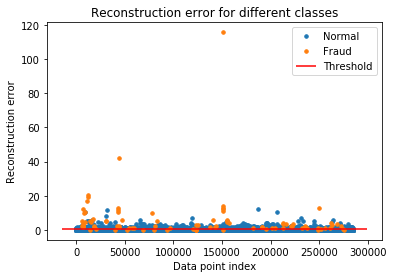

In [22]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

##### <img src="metadata/precision_recall.png" width="400" height="400">
<img src="metadata/precision.png" width="500" height="300">
<img src="metadata/recall.png" width="500" height="300">

### use precision & recall, precision, recall graphs to decide on threshold

Ideally we want both value to be high
For frauds, we would prefer recall to have a higher value while compromising on precision


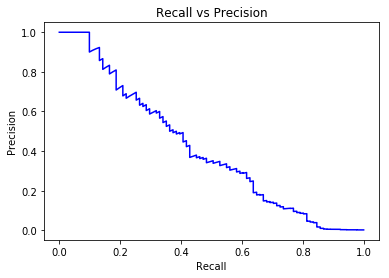

[3.15819262e-02 3.15832061e-02 3.15834712e-02 ... 2.02581405e+01
 4.23008900e+01 1.15643222e+02]


In [23]:
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()
print(th)

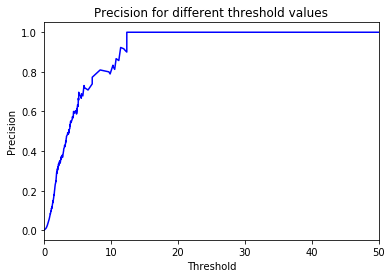

In [24]:
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.xlim(0, 50)
plt.show()
#activity_regularizer how to set value, how does value affect 

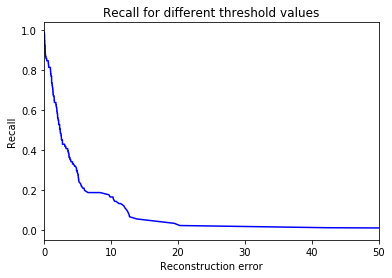

In [25]:
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values')
plt.xlabel('Reconstruction error')
plt.ylabel('Recall')
plt.xlim(0, 50)
plt.show()
